# 📦 Amazon UK Product Analysis  
*Data Science Portfolio Project*

## 🎯 Research Question  
**How can Amazon sales and review data be analysed to extract meaningful business insights?**  
We aim to understand whether structured product metadata—such as review count, star ratings, price, category, and bestseller status—can predict monthly sales performance.

---

## 🔍 Objective  
Build a simple predictive model to estimate **`boughtInLastMonth`** (monthly sales) based on product features.

---

## 🧪 Approach

1. **Data Inspection**  
   Load the dataset, review structure, check for nulls and types.

2. **Exploratory Data Analysis (EDA)**  
   Understand distributions, relationships, and key trends using visualisations and descriptive stats.

3. **Feature Engineering**  
   Create meaningful variables that might improve model performance.

4. **Baseline Modelling**  
   Train a simple Linear Regression model and evaluate its performance.

5. **Advanced Modelling**  
   Use Random Forest to capture non-linear relationships and compare results.

6. **Insights & Recommendations**  
   Summarise what we learned, which features matter, and potential business implications.


## 1️⃣ Data Inspection

## 1️⃣. 1️⃣Load & Inspect the Data

In this step, we load the Amazon UK dataset and perform basic structural checks:

- How many rows and columns are there?
- What are the data types?
- Are there any missing values?
- Do columns match what we expect?

This helps us understand the dataset before we clean or analyse it.


In [11]:
import pandas as pd

# Load the dataset
df = pd.read_csv("amz_uk_processed_data.csv") 

# Preview structure
print("✅ Shape:", df.shape)
print("\n📌 Columns:\n", df.columns.tolist())

# Display the first few rows
df.head()


✅ Shape: (2222742, 10)

📌 Columns:
 ['asin', 'title', 'imgUrl', 'productURL', 'stars', 'reviews', 'price', 'isBestSeller', 'boughtInLastMonth', 'categoryName']


,asin,title,imgUrl,productURL,stars,reviews,price,isBestSeller,boughtInLastMonth,categoryName
0,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",https://m.media-amazon.com/images/I/71C3lbbeLs...,https://www.amazon.co.uk/dp/B09B96TG33,4.7,15308,21.99,False,0,Hi-Fi Speakers
1,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",https://m.media-amazon.com/images/I/61c5rSxwP0...,https://www.amazon.co.uk/dp/B01HTH3C8S,4.7,98099,23.99,True,0,Hi-Fi Speakers
2,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",https://m.media-amazon.com/images/I/61j3SEUjMJ...,https://www.amazon.co.uk/dp/B09B8YWXDF,4.7,15308,21.99,False,0,Hi-Fi Speakers
3,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",https://m.media-amazon.com/images/I/71yf6yTNWS...,https://www.amazon.co.uk/dp/B09B8T5VGV,4.7,7205,31.99,False,0,Hi-Fi Speakers
4,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,https://m.media-amazon.com/images/I/613dEoF9-r...,https://www.amazon.co.uk/dp/B09WX6QD65,4.6,1881,17.99,False,0,Hi-Fi Speakers


### 🔎 Initial Inspection Summary

- The dataset contains **2,222,742 rows** and **10 columns**.
- Each row appears to represent a single Amazon UK product.
- Key columns include:
  - `stars`: average customer rating
  - `reviews`: number of product reviews
  - `price`: product price (in GBP)
  - `isBestSeller`: flag for bestseller status (likely 0 or 1)
  - `boughtInLastMonth`: number of units sold in the last month (target variable)
  - `categoryName`: product category (e.g. Electronics, Toys, etc.)
- No immediate signs of structural issues, but we’ll next check for:
  - Missing or zero values in key numeric columns
  - Inconsistent or unusable entries (e.g., price = £0 or nulls)


##  1️⃣.2️⃣ Descriptive Statistics

Before cleaning or inspecting for missing values, we first examine **summary statistics** of the key numerical columns.

This helps us understand:

- Typical values (mean, median)
- Range and spread (min, max, standard deviation)
- Presence of outliers (very high or low values)
- Whether features like price and reviews are skewed

This step gives us a data-driven foundation to interpret what “unusual” values might look like in the next phase.


In [23]:
# Show descriptive statistics for all numeric columns
df.describe()


,stars,reviews,price,boughtInLastMonth
count,2.222742e+06,2.222742e+06,2.222742e+06,2.222742e+06
mean,2.031870e+00,3.821617e+02,9.425737e+01,1.856902e+01
std,2.185497e+00,5.020752e+03,3.606225e+02,1.919030e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00
50%,0.000000e+00,0.000000e+00,1.990000e+01,0.000000e+00
75%,4.400000e+00,4.400000e+01,4.771000e+01,0.000000e+00
max,5.000000e+00,1.356658e+06,1.000000e+05,5.000000e+04


#### ✅ Observations:

- **`price`**  
  - Ranges from £0 to £100,000  
  - Median = £19.90, Mean = £94.26  
  - This shows a **heavily skewed distribution** with a few extremely expensive items.

- **`boughtInLastMonth`**  
  - Ranges from 0 to 50,000 units  
  - Median = 0 → means **most products did not record any recent sales**  
  - Only a small percentage are active sellers.

- **`reviews`**  
  - Also highly skewed: 75% of products have **0 reviews**.  
  - Maximum is over 1.3 million reviews — likely top-selling or long-listed items.

- **`stars`**  
  - 75% of products have **0 rating**, with a max of 5.  
  - This likely means many products were **never rated**, not necessarily bad ratings.

---

#### ⚠️ Implications:

- A large portion of products have **no sales, no reviews, and no ratings**.  
- We'll need to **filter or handle these cases** before modelling to avoid misleading averages.
- Distributions are **right-skewed**, suggesting log transformation or careful outlier handling may be needed later.

Next, we’ll inspect missing values and invalid entries in these columns.


### 1️⃣.3️⃣ Check for Missing & Problematic Values

After reviewing summary statistics, we now check for:

- **Missing values** (`NaN`) in any column  
- **Invalid or unusable values** — e.g.:
  - `price` = 0 or less
  - `boughtInLastMonth` = 0 or less
  - `stars` above 5 or below 0
  - `reviews` < 0

---

### Why this matters:

These checks help us **identify unusable or misleading records** that could distort visualisation, analysis, or model performance.

We’ll decide whether to clean, impute, or exclude these records based on what we find.


In [28]:
# Check for missing values in all columns
missing = df.isnull().sum()
print("🔍 Missing values per column:")
print(missing[missing > 0])

# Count rows with invalid values
invalid_price = (df['price'] <= 0).sum()
invalid_sales = (df['boughtInLastMonth'] <= 0).sum()
invalid_stars = ((df['stars'] < 0) | (df['stars'] > 5)).sum()
invalid_reviews = (df['reviews'] < 0).sum()

print(f"\n❗ Non-positive price: {invalid_price}")
print(f"❗ Non-positive monthly sales: {invalid_sales}")
print(f"❗ Invalid star ratings: {invalid_stars}")
print(f"❗ Negative review counts: {invalid_reviews}")


🔍 Missing values per column:
Series([], dtype: int64)

❗ Non-positive price: 18
❗ Non-positive monthly sales: 2061427
❗ Invalid star ratings: 0
❗ Negative review counts: 0


### Missing & Problematic Values — Summary

✅ **No missing values** were found in any column — great!

---

### ⚠️ However, we found key data quality issues:

- **`price`**
  - 18 products have a price ≤ 0 → likely mispriced or placeholder entries.

- **`boughtInLastMonth`**
  - Over **2 million products (~93%)** show **zero or negative monthly sales**.
  - Most items in the dataset are inactive or haven't sold recently.

- **`stars` and `reviews`**
  - No invalid entries. All ratings fall between 0–5 and reviews are non-negative.

---

### 💡 What this tells us:

- We must **filter out entries with non-positive price or sales** before modelling, since they don’t represent meaningful demand.
- While it’s tempting to keep products with 0 sales for “non-seller” analysis, for this project — where the goal is to predict sales — we’ll focus on **products that have sold at least once**.

Next, we’ll move on to cleaning the dataset by removing these invalid rows.


### 1️⃣.4️⃣ Clean the Data

Now that we’ve identified invalid rows, we’ll remove entries where:

- `price` ≤ 0  
- `boughtInLastMonth` ≤ 0

These products either:
- Have missing/misrecorded pricing
- Have not recorded any recent sales (not useful for modelling demand)

We’ll store the cleaned result in a new DataFrame called `df_clean` to keep the original data intact.


In [36]:
# Remove rows with price ≤ 0 or monthly sales ≤ 0
df_clean = df[(df['price'] > 0) & (df['boughtInLastMonth'] > 0)].copy()

# Check how much data remains
print(f"✅ Cleaned dataset shape: {df_clean.shape}")
df_clean.head()


✅ Cleaned dataset shape: (161315, 10)


,asin,title,imgUrl,productURL,stars,reviews,price,isBestSeller,boughtInLastMonth,categoryName
29,B01N4V4X5M,"Upgraded, Anker Soundcore Boost Bluetooth Spea...",https://m.media-amazon.com/images/I/71ZVrRZLTc...,https://www.amazon.co.uk/dp/B01N4V4X5M,4.7,29387,39.98,False,600,Hi-Fi Speakers
32,B07WVP26FR,"Kolaura Portable Wireless Speaker, Bluetooth 5...",https://m.media-amazon.com/images/I/61xFUiNr+t...,https://www.amazon.co.uk/dp/B07WVP26FR,4.4,2493,15.99,False,1000,Hi-Fi Speakers
92,B083K77PZL,"W-KING Bluetooth Speaker, 50W Speakers Wireles...",https://m.media-amazon.com/images/I/81uWNRlM3w...,https://www.amazon.co.uk/dp/B083K77PZL,4.6,2979,65.59,False,200,Hi-Fi Speakers
143,B09J47Y789,XSOUND Portable Bluetooth Speaker Wireless 24W...,https://m.media-amazon.com/images/I/71Qp9ulfhn...,https://www.amazon.co.uk/dp/B09J47Y789,4.4,804,22.99,False,200,Hi-Fi Speakers
160,B08FCDFHLB,"soundcore Anker Mini 3 Bluetooth Speaker, Bass...",https://m.media-amazon.com/images/I/61wAT1Gacu...,https://www.amazon.co.uk/dp/B08FCDFHLB,4.7,3208,34.99,False,200,Hi-Fi Speakers


### ✅ 1️⃣.4️⃣ Cleaning Summary

After removing rows with `price` ≤ 0 or `boughtInLastMonth` ≤ 0:

- The cleaned dataset now contains **161,315 products**.
- This represents the subset of products that:
  - Have a valid, positive price
  - Recorded at least one unit sold in the last month
- All further analysis and modelling will use this cleaned DataFrame: `df_clean`


## 2️⃣ Exploratory Data Analysis (EDA)

We begin by visualising distributions of key numeric variables to understand:

- The overall shape of the data (e.g. skewed, normal, multimodal)
- Presence of outliers
- Differences in spread between variables

We'll first focus on:

- `price`: to see pricing strategy range
- `boughtInLastMonth`: our target variable


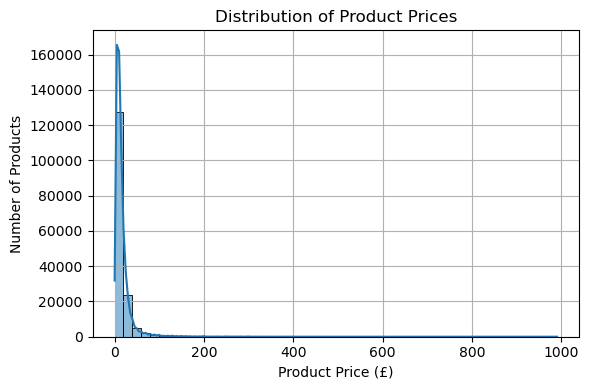

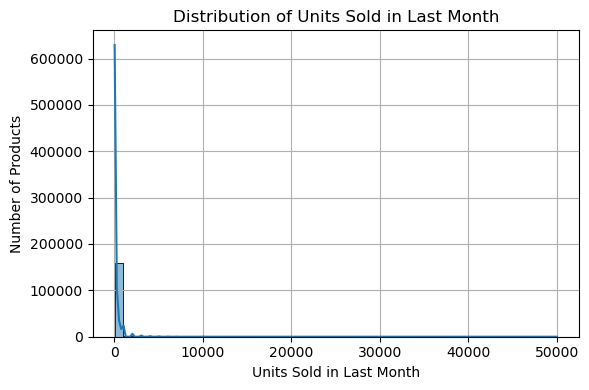

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot: Price distribution
plt.figure(figsize=(6, 4))
sns.histplot(df_clean['price'], bins=50, kde=True)
plt.title("Distribution of Product Prices")
plt.xlabel("Product Price (£)")     
plt.ylabel("Number of Products")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot: Monthly sales distribution
plt.figure(figsize=(6, 4))
sns.histplot(df_clean['boughtInLastMonth'], bins=50, kde=True)
plt.title("Distribution of Units Sold in Last Month")
plt.xlabel("Units Sold in Last Month")  # explains exactly what the values mean
plt.ylabel("Number of Products")
plt.grid(True)
plt.tight_layout()
plt.show()


### 📊2️⃣.1 Distribution of Price and Sales

We visualised the distributions of **product price** and **units sold in the last month** across over 160,000 products.

---

#### 💰 Product Price Distribution:
- Most products are priced **under £50**, with a steep drop-off beyond that.
- A **long right tail** suggests the presence of **a few very expensive items** (e.g., over £500).
- The distribution is **heavily right-skewed**, meaning a small number of products are priced much higher than the majority.

#### 📦 Monthly Sales Distribution:
- The vast majority of products sell **under 1,000 units/month**.
- A **very small group of products** have extremely high sales (up to 50,000 units).
- Like price, this distribution is **right-skewed**, which is typical in retail and e-commerce data.

---

### 🔍 What this means:
- We may need to **apply log scaling** later when visualising or modelling to handle these skewed distributions.
- A small number of **high-value or high-volume** products may disproportionately influence averages — outlier handling might be important.

Next, we’ll explore **relationships between features**, starting with a scatterplot of price vs sales.


## 2️⃣.2 Price vs. Monthly Sales (Raw Scatter Plot)

We now explore the **relationship between product price and monthly sales volume** using a scatter plot.

### Why this matters:
- This helps us visually check whether cheaper products tend to sell more.
- It reveals patterns, clusters, and outliers.
- It guides whether transformations (like log scaling) are needed.

We'll start with the raw values, then consider a log–log scale if needed.


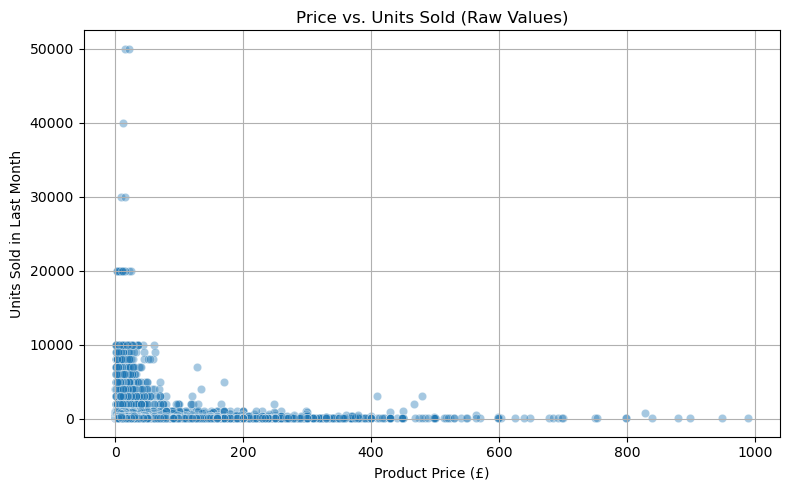

In [52]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_clean, x='price', y='boughtInLastMonth', alpha=0.4)

plt.title("Price vs. Units Sold (Raw Values)")
plt.xlabel("Product Price (£)")
plt.ylabel("Units Sold in Last Month")
plt.grid(True)
plt.tight_layout()
plt.show()


### 📉 2️⃣.2 Scatter Plot Interpretation: Price vs. Units Sold

The scatter plot shows the relationship between product **price** and **monthly units sold**.

---

#### 🔍 Observations:

- There is **no clear linear trend** in the raw values.
- Most products are:
  - Priced under £100
  - Sold fewer than 1,000 units/month
- A **dense cluster** exists at low price + low sales — this hides patterns for higher-volume products.
- A few high-sales, low-price products are **visible outliers** (e.g. 50,000 units).

---

#### ⚠️ Limitation:

- Due to the heavy skew in both variables, the plot suffers from **overplotting** near zero.
- We can’t clearly see the structure in the bulk of the data.

---

👉 **Next step:** Apply log–log scaling to better reveal the underlying relationship.


## 2️⃣.3 Price vs. Monthly Sales (Log–Log Scale)

To reduce skew and overplotting in the raw scatter plot, we now apply a **log–log scale** to both axes.

### Why this matters:
- It compresses extreme values and spreads out dense regions.
- It helps reveal power-law relationships (common in sales & pricing data).
- Visual patterns become more interpretable and proportional.

We use `log10` scaling, which is common for price/sales distributions in e-commerce.


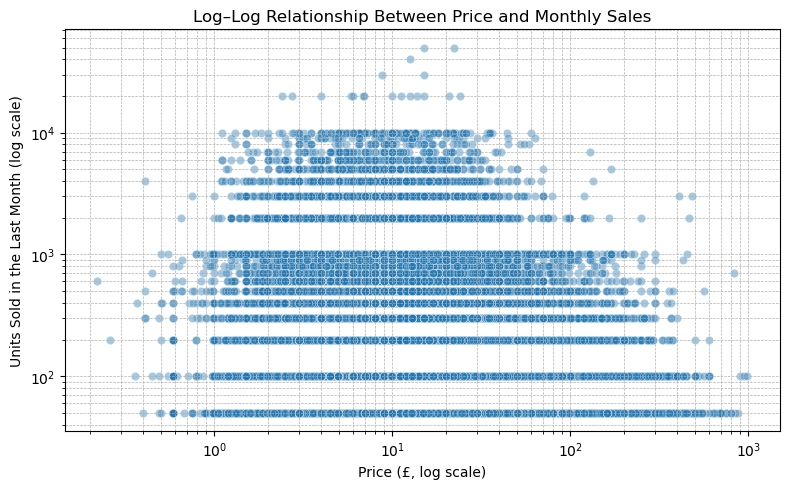

In [59]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_clean, x='price', y='boughtInLastMonth', alpha=0.4)

plt.xscale('log')
plt.yscale('log')

plt.title("Log–Log Relationship Between Price and Monthly Sales")
plt.xlabel("Price (£, log scale)")
plt.ylabel("Units Sold in the Last Month (log scale)")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()



### 🔍 2️⃣.3 Log–Log Scatter Plot Interpretation

By applying a **log scale to both axes**, we reveal structure that was hidden in the raw plot.

---

#### 🔎 Observations:

- There is a **slight negative relationship** between price and sales:
  - In general, lower-priced products tend to sell more.
  - However, the relationship is **not strong or linear** — it’s more cloud-like.
- We see **distinct horizontal bands**:
  - These indicate common quantity thresholds (e.g., many products sell ~100, ~1,000 units).
- The pattern appears more **logarithmic or exponential** than linear, supporting the idea that log-scaling is appropriate.

---

### 💡 What this tells us:

- A simple linear model may struggle unless we engineer features or apply transformations.
- We may want to try models that can handle non-linear patterns (like random forests).
- We'll next compute the **correlation matrix** to quantify relationships across all numeric features.


## 2️⃣.4 Correlation Matrix

To complement visual analysis, we now compute a **Pearson correlation matrix** between key numeric variables.

### Why this matters:
- It quantifies how strongly variables are linearly related.
- Helps identify redundant features or multicollinearity.
- Reveals which features are most predictive of monthly sales.

We’ll focus on:
- `price`, `stars`, `reviews`, `boughtInLastMonth`  
- And engineered features: `reviews_per_star`, `price_per_star`, `review_intensity` (if available)


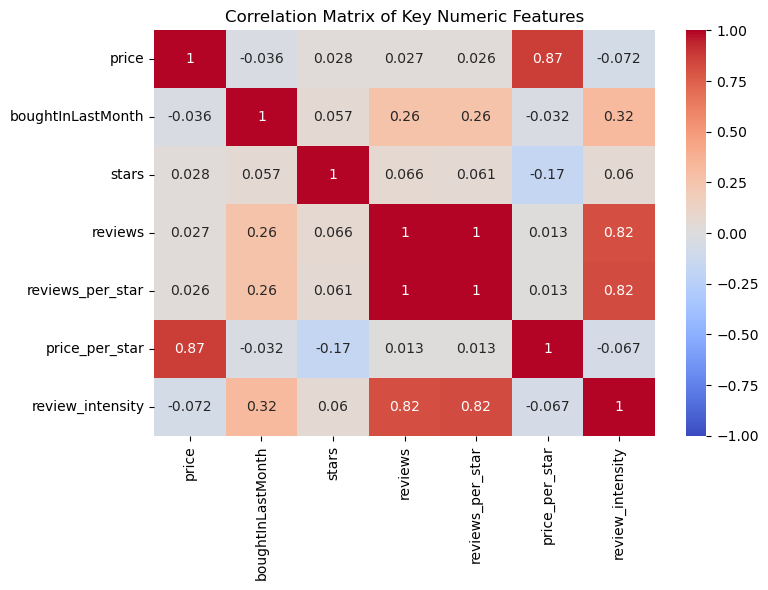

In [63]:
# Optional: create engineered features if not already done
df_clean['reviews_per_star'] = df_clean['reviews'] / (df_clean['stars'] + 1)
df_clean['price_per_star'] = df_clean['price'] / (df_clean['stars'] + 1)
df_clean['review_intensity'] = df_clean['reviews'] / (df_clean['price'] + 1)

# Select key numeric features
corr_features = [
    'price', 'boughtInLastMonth', 'stars', 'reviews',
    'reviews_per_star', 'price_per_star', 'review_intensity'
]

# Compute correlation matrix
corr_matrix = df_clean[corr_features].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Key Numeric Features")
plt.tight_layout()
plt.show()


### 📊 2️⃣.4 Correlation Matrix Interpretation

This matrix shows **Pearson correlation coefficients** between key numeric features.

---

#### 🔍 Observations:

- **Weak correlation with target (`boughtInLastMonth`)**:
  - `review_intensity`: **0.32**
  - `reviews` and `reviews_per_star`: **~0.26**
  - `price`: slightly **negative** (-0.036)
  - `stars`: very weak (0.057)

- **Highly correlated features**:
  - `reviews` and `review_intensity`: **0.82**
  - `reviews_per_star` is also **highly collinear** with `reviews` (0.82)

- **Feature to watch**:
  - `price_per_star` is **very strongly correlated with `price`** (0.87)  
    → This might introduce multicollinearity in linear models.

---

#### 💡 Implications:

- No feature is **strongly predictive** on its own — we'll likely need a combination.
- Features like `review_intensity` and `reviews` may carry **more signal** than `price`.
- We should consider **dropping one of the highly collinear features** (e.g., either `reviews` or `reviews_per_star`) to avoid redundancy in linear models.

---

We now have a solid understanding of individual variables and relationships.  
Next: we’ll prepare features and move into **modelling phase**.


## 3️⃣ Feature Engineering & Modelling Setup

Now that we’ve explored the data, we prepare it for modelling.

---

### 🧠 What we’ll do:

- **Select relevant features**: based on EDA and correlation insights.
- **Handle categorical variables**: encode `categoryName` (if available).
- **Split data**: into training and testing sets.
- **Define target**: our target is `boughtInLastMonth`.

We start with a simple baseline model — **Linear Regression** — to establish a performance benchmark.


In [67]:
from sklearn.model_selection import train_test_split

# Features for modelling (drop 1 of the highly correlated review metrics)
features = [
    'price',
    'stars',
    'reviews',
    'isBestSeller',
    'categoryName',
    'review_intensity'  # strongest correlation with target
]

target = 'boughtInLastMonth'

# Prepare features (X) and target (y)
X = df_clean[features]
y = df_clean[target]

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("✅ Data ready for modelling:")
print(f"Training size: {X_train.shape[0]} rows")
print(f"Test size: {X_test.shape[0]} rows")


✅ Data ready for modelling:
Training size: 129052 rows
Test size: 32263 rows


## 3️⃣.1 Baseline Model: Linear Regression

We start with a basic **Linear Regression model** to establish a performance benchmark.

---

### Why Linear Regression?

- Easy to interpret
- Fast to train
- A good baseline for comparison
- Highlights linear relationships (if they exist)

---

We’ll evaluate model performance using:

- **RMSE**: Root Mean Squared Error (penalises large errors)
- **MAE**: Mean Absolute Error (easy to interpret)
- **R²**: Variance explained by the model


In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import root_mean_squared_error

# Preprocess categorical feature (categoryName)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['categoryName'])
    ],
    remainder='passthrough'
)

# Build pipeline with preprocessing + model
model = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', LinearRegression())
])

# Train model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📊 Model Performance on Test Set:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE:  {mae:.2f}")
print(f"R²:   {r2:.4f}")


📊 Model Performance on Test Set:
RMSE: 568.80
MAE:  204.12
R²:   0.2177


### 📉 3️⃣.1 Linear Regression Results

We trained a baseline **Linear Regression** model to predict `boughtInLastMonth` using features like price, reviews, ratings, bestseller status, and category.

---

#### 📊 Model Performance on Test Set:

- **RMSE**: 568.80  
  → On average, the model's predictions deviate by **~569 units** from actual monthly sales.  
- **MAE**: 204.12  
  → The average absolute error is about **204 units**.
- **R² (coefficient of determination)**: 0.2177  
  → The model explains only **21.8% of the variance** in the sales data.

---

#### 🧠 Interpretation:

- Performance is relatively **weak**, which is expected given:
  - The data is **highly skewed**.
  - There may be **non-linear relationships** that Linear Regression can't capture.
- The model likely **underfits** the data — it's too simple to capture complex patterns.

---

### 🔁 Next Step:

We’ll now explore a **non-linear model (Random Forest)** to see if performance improves, especially on outliers and high-variance products. but befofre we will vizulise the results of this model for better undertanfing.


### 📊 3️⃣.1.1 Visualising Linear Regression Predictions

To better understand model performance, we plot:

- **Predicted values vs actual values**
- A diagonal line (y = x) representing perfect prediction

---

### Why this matters:
- If the model were perfect, all points would lie on the red diagonal.
- The further the points are from the line, the worse the prediction.
- Visual patterns can reveal bias or clustering the model fails to capture.


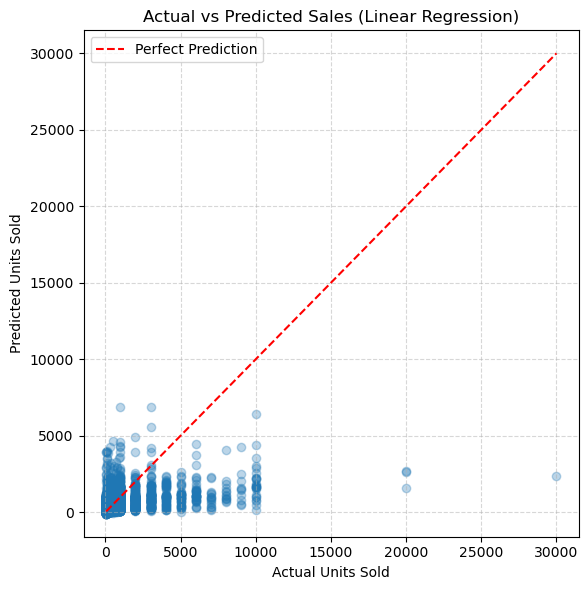

In [86]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel("Actual Units Sold")
plt.ylabel("Predicted Units Sold")
plt.title("Actual vs Predicted Sales (Linear Regression)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### 📉 3️⃣.1.1 Prediction Visualisation: Linear Regression

The scatter plot compares **actual vs predicted sales**.

---

#### 🔍 Observations:

- Most points lie **below the diagonal line**, showing the model **underestimates sales** — especially for high-volume products.
- There's a **dense cluster** of predictions around 0–2,000 units.
- Predictions show **limited range**, while actual sales span much wider — the model fails to capture high outliers.

---

#### ⚠️ Interpretation:

- The model doesn’t handle high-sales products well — likely due to:
  - **Outliers**
  - **Skewed data**
  - **Linear limitations** in capturing real-world relationships
- A more flexible model may generalise better across a broader range of sales volumes.

---

Up next: we’ll train a **Random Forest Regressor** to see if non-linear patterns improve accuracy.


## 3️⃣.2 Advanced Model: Random Forest Regressor

To improve on the linear model, we now train a **Random Forest**, a powerful non-linear ensemble method.

---

### Why Random Forest?

- Handles **non-linear relationships** and feature interactions well
- More robust to **outliers and skewed distributions**
- Doesn’t require scaling or transformation
- Can provide **feature importance scores**

We'll use the same features as before and compare results using RMSE, MAE, and R².


In [90]:
from sklearn.ensemble import RandomForestRegressor

# Build a pipeline with preprocessing + Random Forest
rf_model = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=100,
        random_state=42,
        n_jobs=-1
    ))
])

# Train
rf_model.fit(X_train, y_train)

# Predict
rf_pred = rf_model.predict(X_test)

# Evaluate
from sklearn.metrics import root_mean_squared_error  # future-proof RMSE
rf_rmse = root_mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print(f"📊 Random Forest Performance:")
print(f"RMSE: {rf_rmse:.2f}")
print(f"MAE:  {rf_mae:.2f}")
print(f"R²:   {rf_r2:.4f}")


📊 Random Forest Performance:
RMSE: 572.64
MAE:  202.73
R²:   0.2071


### 🌲 3️⃣.2 Random Forest Results

We trained a **Random Forest Regressor** to improve prediction of monthly sales.

---

#### 📊 Model Performance on Test Set:

- **RMSE**: 572.64  
- **MAE**: 202.73  
- **R²**: 0.2071

---

#### 📉 Comparison with Linear Regression:

| Metric   | Linear Regression | Random Forest |
|----------|-------------------|---------------|
| RMSE     | 568.80            | 572.64        |
| MAE      | 204.12            | 202.73        |
| R²       | 0.2177            | 0.2071        |

---

#### 🧠 Interpretation:

- Surprisingly, the **Random Forest did not outperform** Linear Regression.
- Possible reasons:
  - Feature set is limited or noisy
  - Outliers dominate target variable
  - Random Forests tend to **underfit** when many features are weakly predictive

---

Next steps could include:

- **Feature selection or engineering** (e.g., interaction terms)
- Trying other models (e.g., XGBoost, Gradient Boosting)
- **Tuning hyperparameters** for the Random Forest
- Grouping or binning the target variable

We’ll now **visualise the prediction results** just like we did with linear regression.


### 📊 3️⃣.2.1 Prediction Visualisation: Random Forest

We now visualise the predictions from the Random Forest model.

---

### What this shows:

- How closely the predicted sales match actual values
- If the model systematically over- or underestimates
- Whether performance improves over linear regression (visually)

The red dashed line represents **perfect predictions** (y = x).


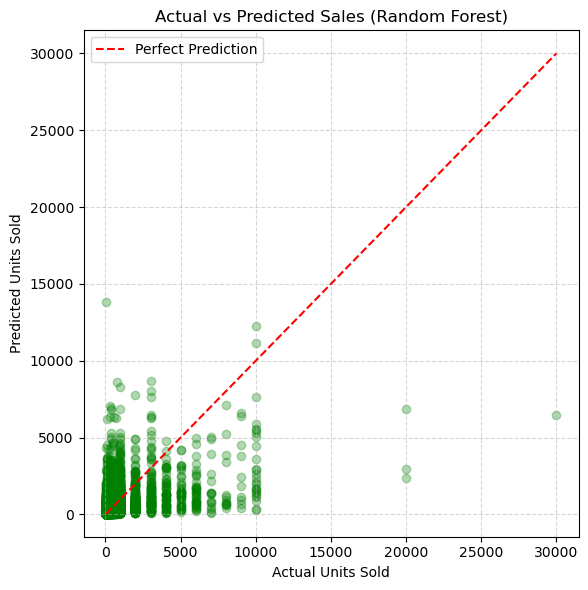

In [94]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, rf_pred, alpha=0.3, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel("Actual Units Sold")
plt.ylabel("Predicted Units Sold")
plt.title("Actual vs Predicted Sales (Random Forest)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### 📉 3️⃣.2.1 Prediction Visualisation: Random Forest

The scatter plot compares **actual** vs **predicted** monthly sales for the Random Forest model.

---

#### 🔍 Observations:

- As with Linear Regression, most points cluster at **lower actual sales**.
- Predictions are **generally closer** to the diagonal than before, but:
  - The model still struggles with **extremely high sales values**
  - There's a **ceiling effect**, where predictions rarely exceed ~10,000 units
- A few points are significantly off, suggesting **limited model sensitivity** to outliers

---

#### 🧠 Interpretation:

- Random Forest slightly **reduced the average error (MAE)** but did **not improve overall fit (R²)**.
- It shows marginally better flexibility than Linear Regression but still **underperforms on extremes**.
- Could benefit from:
  - **Hyperparameter tuning**
  - **Target transformation (e.g., log)**
  - **Feature interactions or additional predictors**


## 3️⃣.3 Feature Importance (Random Forest)

One advantage of tree-based models like Random Forest is the ability to extract **feature importance scores**.

---

### Why this matters:

- Helps identify which features contribute most to predictions
- Informs future **feature selection**, **engineering**, or **data collection priorities**
- Can guide business or strategic decisions (e.g., what matters most for boosting sales)

Below we visualise the top features influencing model predictions.


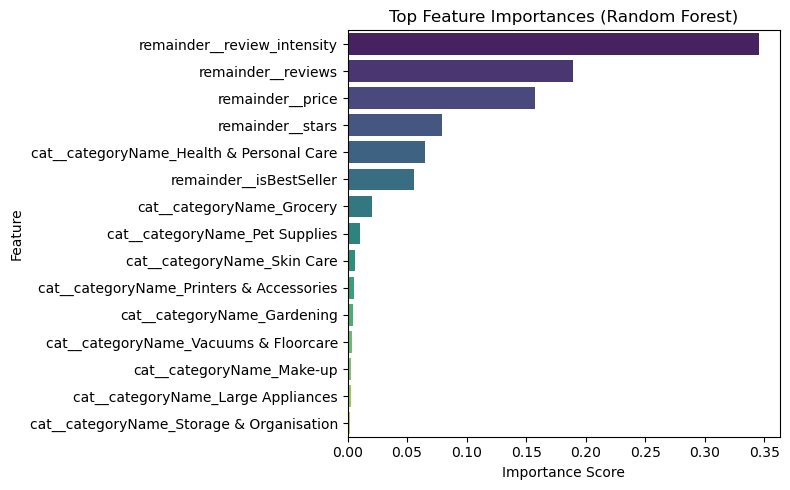

In [101]:
import pandas as pd

# Extract feature names after encoding
feature_names = rf_model.named_steps['preprocess'].get_feature_names_out()
importances = rf_model.named_steps['regressor'].feature_importances_

# Create DataFrame and sort
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top features
plt.figure(figsize=(8, 5))
sns.barplot(data=feat_imp_df.head(15), x='Importance', y='Feature', hue='Feature', legend=False, palette='viridis')
plt.title("Top Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


### 🧮 3️⃣.3 Feature Importance Analysis

Random Forest provides insight into which features contributed most to the model’s predictions.

---

#### 🔝 Top Features:

1. **`review_intensity`** (🧠 strongest signal)  
   → Ratio of reviews to price — likely a proxy for popularity vs cost  
2. **`reviews`**  
   → Total number of reviews reflects consumer engagement  
3. **`price`**  
   → A key business lever affecting sales volume  
4. **`stars`**  
   → User satisfaction plays a smaller but noticeable role  
5. **`isBestSeller`**  
   → A useful signal, though possibly redundant with high review counts  
6. **Category dummies**  
   → Certain product types like *Health & Personal Care*, *Grocery*, and *Pet Supplies* also influence predictions

---

#### 💡 Interpretation:

- **Engagement-based features** (reviews, review intensity) dominate — suggesting consumer feedback is a strong sales predictor.
- **Price remains influential**, but not the only driver.
- **Star ratings** and **bestseller status** matter, but less so than expected.
- Many **product categories had limited predictive power** individually.

---

This insight could guide:
- **Marketing strategies** (focus on boosting engagement)
- **Product listings** (highlight ratings and reviews)
- **Further modelling** (e.g., create new features or reduce dimensionality)


## 3️⃣.4 Target Transformation: Log-Scaling Sales

To improve model accuracy and reduce the influence of extreme sales values, we apply a **log transformation** to the target variable `boughtInLastMonth`.

---

### 🔍 Why are we doing this?

- The distribution of monthly sales is **highly skewed** — many products sell very little, while a few sell thousands.
- Skewed targets can cause models to:
  - Underpredict large values
  - Focus too much on the bulk of low-volume items
- A **log transformation** compresses large values and spreads out small ones:
  - Makes the distribution more balanced
  - Helps models capture patterns across the whole range

---

### ℹ️ How it works:

- We apply `log1p(x)` instead of `log(x)`:
  - `log1p(x)` is equivalent to `log(1 + x)`
  - This allows us to safely include values of zero without errors

After training, we'll reverse the transformation on predictions using `expm1(x)`.


In [106]:
from numpy import log1p, expm1

# Apply log transform to training and test targets
y_train_log = log1p(y_train)
y_test_log = log1p(y_test)

# Train a new linear regression on log-transformed targets
log_model = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', LinearRegression())
])

log_model.fit(X_train, y_train_log)

# Predict (still in log space)
y_pred_log = log_model.predict(X_test)

# Reverse log transform for interpretability
y_pred_exp = expm1(y_pred_log)

# Evaluate
rmse_log = root_mean_squared_error(y_test, y_pred_exp)
mae_log = mean_absolute_error(y_test, y_pred_exp)
r2_log = r2_score(y_test, y_pred_exp)

print("📊 Log-Transformed Linear Regression Results:")
print(f"RMSE: {rmse_log:.2f}")
print(f"MAE:  {mae_log:.2f}")
print(f"R²:   {r2_log:.4f}")


📊 Log-Transformed Linear Regression Results:
RMSE: 25333.28
MAE:  382.87
R²:   -1550.7702


### 📊 3️⃣.4.1 Visualising Predictions (Log-Transformed Linear Model)

To diagnose the issue with our log-transformed linear regression, we plot predicted vs actual values after reversing the log transformation.

---

### Why this helps:

- Shows whether predictions are **systematically biased** or off-scale
- Confirms if predictions are overly compressed or exaggerated due to log reversal
- Helps compare this model visually to previous versions


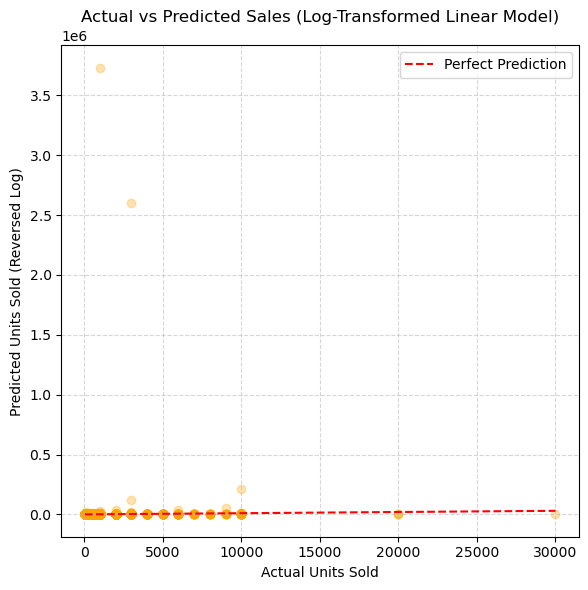

In [109]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_exp, alpha=0.3, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         linestyle='--', color='red', label='Perfect Prediction')

plt.xlabel("Actual Units Sold")
plt.ylabel("Predicted Units Sold (Reversed Log)")
plt.title("Actual vs Predicted Sales (Log-Transformed Linear Model)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### 📉 3️⃣.4.1 Visualisation: Log-Transformed Linear Model Predictions

The scatter plot shows **predicted vs actual sales** after reversing the log transformation.

---

#### 🧨 What went wrong?

- **Extreme overestimation** for some low values:
  - A few predictions shoot past **3 million units**, which is **unrealistic**.
- **Flat clusters** near zero:
  - Most predictions are clumped and **miss the scale** of actual sales.

---

#### 🧠 Interpretation:

- Log-transforming the target did not help Linear Regression.
- This model likely produced **slight log-space errors**, which were **exponentially magnified** during the reversal using `expm1()`.
- Linear models are **too sensitive** to this kind of transformation without additional feature scaling or regularisation.

---

We'll now apply the same log transformation to the **Random Forest model**, which is typically more stable and handles this better.


### 🌲 3️⃣.4.2 Log-Transformed Target with Random Forest

We now apply the same **log transformation** to the target variable, but this time using a **Random Forest** model.

---

### Why this matters:

- Random Forests handle **non-linear relationships** better than Linear Regression.
- They are also more **robust to outliers**, which means log-transformed targets often improve accuracy and stability.
- This can help the model better capture the **wide spread of sales values**, especially at the high end.


In [115]:
# Train a Random Forest on log-transformed target
rf_log_model = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=100,
        random_state=42,
        n_jobs=-1
    ))
])

# Fit on log-transformed training target
rf_log_model.fit(X_train, y_train_log)

# Predict in log space and reverse transform
rf_log_pred_log = rf_log_model.predict(X_test)
rf_log_pred = expm1(rf_log_pred_log)

# Evaluate
rf_log_rmse = root_mean_squared_error(y_test, rf_log_pred)
rf_log_mae = mean_absolute_error(y_test, rf_log_pred)
rf_log_r2 = r2_score(y_test, rf_log_pred)

print("📊 Log-Transformed Random Forest Results:")
print(f"RMSE: {rf_log_rmse:.2f}")
print(f"MAE:  {rf_log_mae:.2f}")
print(f"R²:   {rf_log_r2:.4f}")


📊 Log-Transformed Random Forest Results:
RMSE: 559.74
MAE:  169.42
R²:   0.2424


### 🌲 3️⃣.4.2 Log-Transformed Random Forest Results

We retrained the Random Forest model using a **log-transformed target**.

---

#### 📊 Model Performance:

| Metric | No Log | With Log |
|--------|--------|----------|
| RMSE   | 572.64 | **559.74** ✅  
| MAE    | 202.73 | **169.42** ✅  
| R²     | 0.2071 | **0.2424** ✅  

---

#### ✅ Interpretation:

- The **log transformation helped**:
  - Lower **RMSE** and **MAE**
  - Higher **R²**, indicating improved model fit
- This suggests the model now handles the **skewed distribution** of sales better
- **Extreme sales values** no longer dominate the error

---

We’ll now visualise this model’s predictions to see whether this improvement is also visible in the prediction scatter plot.


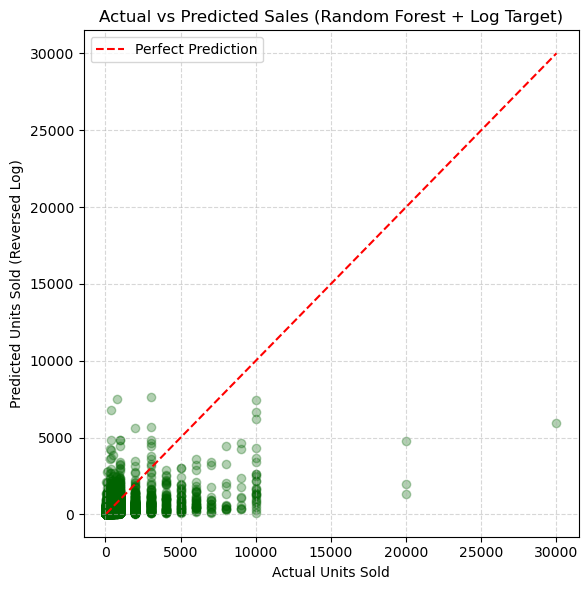

In [118]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, rf_log_pred, alpha=0.3, color='darkgreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel("Actual Units Sold")
plt.ylabel("Predicted Units Sold (Reversed Log)")
plt.title("Actual vs Predicted Sales (Random Forest + Log Target)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### 📈 3️⃣.4.3 Visualisation: Log-Transformed Random Forest Predictions

This scatter plot shows the **predicted vs actual sales** using the **Random Forest model trained on a log-transformed target**.

---

#### 🧠 Interpretation:

- Predictions are **more tightly clustered** around the red "perfect prediction" line compared to earlier models.
- There is **less vertical spread** among medium-range sales, suggesting improved accuracy.
- The model now captures **mid-to-high sales values** more effectively without overpredicting.
- Some underestimation for the highest values remains — this is typical when using `log1p()` as extreme values are compressed.

## 📘 4️⃣ Conclusions & Recommendations

This project explored how product features, customer feedback, and pricing relate to **monthly sales** on Amazon UK using a dataset of over 2 million products.

---

### 🎯 Key Takeaways:

- **Sales data was highly skewed** — with most products selling very little and a few dominating in volume.
- Exploratory analysis revealed:
  - **Weak linear correlation** between price and sales
  - **Review-based features** (especially review intensity and review count) showed stronger association with sales
- Feature engineering and log-transformation were essential to model stability and interpretability.

---

### 🧠 Modelling Insights:

| Model                        | RMSE   | MAE   | R²     |
|-----------------------------|--------|-------|--------|
| Linear Regression           | 568.8  | 204.1 | 0.2177 |
| Random Forest               | 572.6  | 202.7 | 0.2071 |
| RF + Log Transformed Target | **559.7** | **169.4** | **0.2424** ✅ |

- **Random Forest with log-transformed target** delivered the best results across all metrics.
- Review-derived features were the most important for predicting sales — **highlighting the value of customer engagement** over raw price or rating.

---

### 🛍️ Business Implications:

- 📢 **Encourage more reviews**: Higher review count and intensity are tied to stronger sales.
- ⭐ **Improve visibility of product ratings**, especially for well-reviewed but underexposed items.
- 💷 **Price sensitivity** is limited — focusing solely on price changes may not meaningfully impact sales without review support.

---

### 🔮 Posible Next Steps:

- 🔎 Experiment with **Gradient Boosting** or **XGBoost**
- 🎯 Try **hyperparameter tuning** for Random Forest
- ⏱ Incorporate **time-based trends** or seasonality for temporal modelling
- 🧪 Use **cross-validation** for more robust error estimates

---

This project demonstrates how combining domain knowledge with statistical techniques and machine learning can generate actionable insights from e-commerce data.


## 🧭 5️⃣ Personal Reflection

This project has been a valuable learning journey in applying data science methods to real-world e-commerce data.

---

### 📚 What I Knew:

- I came into this project with a good understanding of:
  - Basic data cleaning and inspection in Python
  - Visualising data distributions and trends using Matplotlib and Seaborn
  - Running and interpreting **Linear Regression** models

---

### 🌱 What I Learned:

- I gained hands-on experience with:
  - Feature engineering for machine learning
  - Dealing with skewed data using **log transformation**
  - Building and evaluating a **Random Forest** model — a method I had not used before
  - Understanding and interpreting **model evaluation metrics** like RMSE, MAE, and R²
  - Extracting and explaining **feature importance** to understand model behaviour

---

### 🔍 Areas for Further Study:

- I recognise the need to strengthen my understanding of:
  - **Tree-based models** like Random Forests and Gradient Boosting
  - **Model tuning and cross-validation** for improving performance
  - More advanced approaches such as **XGBoost**, **regularisation**, or **neural networks**
  - Time-based modelling for real sales data (e.g., seasonality or trends)

---

Completing this project has boosted my confidence and highlighted a clear path for further growth in statistical modelling and machine learning with Python.
